# Load the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping,ModelCheckpoint

Using TensorFlow backend.


# Reading the training and test dataset

In [ ]:
with open('jigsaw-toxic-comment-classification-challenge/train.csv','r') as file:
    csv_reader = csv.reader(file,delimiter=',')
    next(csv_reader)
    comments = []
    for row in csv_reader:
        comments.append(row[1])
        
# Test data
with open('jigsaw-toxic-comment-classification-challenge/test.csv','r') as file:
    csv_reader = csv.reader(file,delimiter=',')
    next(csv_reader)
    test_comments = []
    test_labels = []
    for row in csv_reader:
        test_comments.append(row[1])


In [4]:
train = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
labels = train[list_classes].values
     
## Reading the test data and seperating the comments and the labels

test = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test.csv')
#test.head(10)
#train.head(10) 
#len(train)

In [5]:
comments = []
l = len(train)
new_size = l-80000
#print (new_size)
for i in range(new_size):
    comments.append(train["comment_text"][i])
labels = labels[0:new_size]
test_comments = []
for i in range(len(test)):
    test_comments.append(test["comment_text"][i])
    

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(comments)


In [8]:
word_index = tokenizer.word_index
#print (word_index)

In [9]:
training_sequences = tokenizer.texts_to_sequences(comments)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_comments)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

# Building a simple model

In [13]:
#file_path = 'weights.hdf5'
#checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#early = EarlyStopping(monitor="val_loss", mode="min", patience=20)
#callbacks_list = [checkpoint,early]
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
    
])

model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 182,446
Trainable params: 182,446
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 2
history = model.fit(x=training_padded,y=labels,epochs=num_epochs,verbose=2)

Epoch 1/2
 - 163s - loss: 0.3068 - acc: 0.9795
Epoch 2/2
 - 160s - loss: 0.3044 - acc: 0.9939


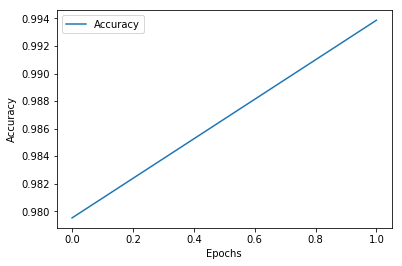

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()